# TP Compressed Sensing for MR Images

Diana Mateus



Participants: HAD Ikrame - ASSERMOUH Meryam

### GOAL
This notebook explores one of the most useful applications of compressed sensing, namely Magnetic Resonance Image (MRI) reconstruction. 

We will use the SigPy module, and this notebook is partly inspired on the module's tutorial. 

There will two datasets to explore:

- The first is a controlled dataset for which we have a ground truth digital **phantom** image.
- The second is a multi-channel data from the ISMRM reproducible challenge (Source: Martin Uecker). The dataset contains k-space measurements of an **in-vivo brain** scan acquired with a projection reconstruction trajectory. 


### References

You can refer to the next links to search the answer of some of the questions

- An old but very useful site about the MR Imaging is https://www.mr-tip.com, here you will find definitions of all the MRI specific terms, the parallel acquisition and also of some of the methods. 

- A complete website about MRI in questions and answers http://mriquestions.com/complete-list-of-questions.html 

- The original scientific papers regarding the new methods (other than classical inv problems algorithms)

    - [Sense](https://www.physast.uga.edu/classes/phys8900/qzhao/PDF8500_08/SENSE.pdf)
    - [Espirit](https://onlinelibrary.wiley.com/doi/pdf/10.1002/mrm.24751)
    
- [SigPy documentation](https://sigpy.readthedocs.io) 

- Do not hesitate to find and cite your own sources (papers, blogs, tutorials or videos)

### Requirements
Install the required module Sigpy and load modules and functions
    

In [3]:
!pip install sigpy

#import sys
#!conda install --yes --prefix {sys.prefix} sigpy

#import sys
#!{sys.executable} -m pip install sigpy

     |████████████████████████████████| 140 kB 5.4 MB/s 


In [4]:
import numpy as np
import sigpy as sp
import sigpy.plot as pl
import matplotlib.pyplot as plt
from math import log10, sqrt 
from sigpy.mri import poisson, spiral,radial
import sigpy.mri as mr



In [10]:
def multiChannelPhantomKspace(shape =(256,256), nchannels=1):

    #loading the logan phantom
    logan = sp.shepp_logan(shape)

    #copying the fft of the phantom on the different channels
    logan_multi = np.zeros((nchannels,shape[0],shape[1]),dtype=np.complex_)
    logan_multi_ksp = np.zeros((nchannels,shape[0],shape[1]),dtype=np.complex_)
    ksp = sp.fft(logan)
    
    for i in range(nchannels):
        logan_multi[i,:,:]= logan
        logan_multi_ksp[i,:,:]= ksp
    return logan_multi_ksp



In [11]:
shape =(256,256)
logan = sp.shepp_logan(shape)

In [12]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):    #  MSE is zero means no noise is present in the signal . 
        return -100  #  Therefore PSNR is irrelevant
    max_pixel = original.max()
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr 

## REPORT INSTRUCTIONS

Prepare a report following the **structure bellow** and answering to the questions **with your own words**

**Hint:** To answer some of the questions you will need to look within the references provided above: ``MRI Questions website`` (e.g. section K-space), you can also search for keywords (e.g. sensitivity, ESPIRIT) within the ``MRI-tip website``



### 1. Visualizing and preparing the datasets

#### 1.1.  K-space:

a) Visualize the **phantom** dataset with a single channel. 

b) Visualize the **invivo brain** dataset with multiple channels.

c) What do the images show? What do the values in the K-Space stand for?
     
    

    

### 2. Reconstruction of the full phantom data

**2.1.** How do we reconstruct the MRI data from a single fully sampled k-space? 
    
**2.2.** Implement and show the results of reconstructing the **phantom** image from the fully sampled data
    
**2.3.** Compute the wavelet transform of the fully reconstructed image. Why is the wavelet transform a good choice for CS? demonstrate by showing the histogram of the wavelet coefficients ordered from the largest to the smallest.




### 3. Reconstruction from a sampled dataset (phantom)

In the next steps we will simulating a compressed sensing  acquisition by sampling the k-space, then reconstruct the image from the sampled data
    
**3.1.** Look at the example code to generate sampling masks, apply the mask to the **phantom data** and show the resultant k-space. What changes when we modify the acceleration rate or the calibration shape? 

**3.2.** Create a sampled phantom dataset by applying a sampling mask created with an acceleration of 6 and a calibration shape of 20.
    
**3.3.** **Reconstruction from sampled data:**  Reconstruct the MR image with the direct method (ifft) considering non sampled coefficients to be zero. What do you observe?

**3.4.** Use the **Wavelets + L1** method from the sigpy mri.apps to reconstruct the **sampled** phantom dataset. What is the criteria being optimized?


**3.5.** Find the optimal lambda parameter by trial-and-error, choosing the value of lambda that maximizes the PSNR with respect to the fully sampled data. 

**3.6.** Discuss how the reconstruction from the full dataset compares to the sampled dataset




### 4. **Compressed sensing** of the in-vivo brain dataset

For the invivo brain dataset we only have access to the sampled data (no full acquisition). However, different to the phantom, this dataset is multi-parallel and can make use of sensitivity maps for reconstruction.


**4.1.** Reconstruct the MR image using the direct reconstruction for each channel. What do you observe? 


**4.2.** Single reconstruction from a mutiparallel acquisition

   a) Describe how multiparallel MRI data differs from traditional MRI?
   
   b) Use the **Root-Sum-of-Squares reconstruction (RSS)** to recover a single MR image from the multichannel and sampled dataset. Consider the non sampled coefficients to be zero. 

$$
    I_{\rm RSS} = 
    \sqrt{
    \sum_{n=1}^{N {\rm channels}} IFFT(ksp)^2
    }
$$

       
**4.3.** Reconstruction with **sensitivity maps**

   a) What is a sensitivity map?, what are sensitivity maps useful for?

   b) Compute and display the **sensitivity maps** for the in-vivo brain dataset using the ESPIRIT app from sigpy. What do you observe?

   c) Use the mri.apps to do the reconstruction of the **brain dataset** using the SENSE method using the computed sensitivity maps
  
   d) Look at the documentation, what criteria is being optimized here?
   
   e) Change the regularization parameters of each method and discuss how they change the qualitative results


**4.4.** **Regularized reconstructions**

   a) Use the mri.apps to do the reconstruction of the **brain dataset** using the following methods
        - Wavelet L1 Reconstruction
        - Total Variation Reconstruction
        
   b) Look at the documentation of each method and explain the problem solved in each case. 
   
   c) Change the regularization parameters of each method and discuss how they change the qualitative results

## 1. Datasets

#### Load and display the k-space data

In [13]:
#load phantom data

ksp_phantom = multiChannelPhantomKspace(nchannels=1)


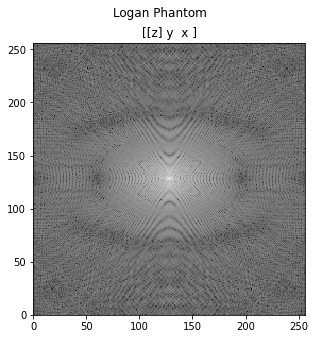

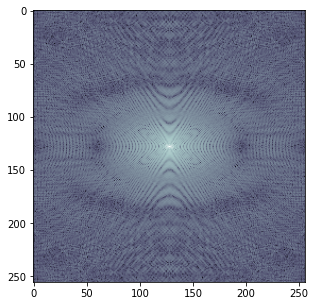

In [14]:
# Visualization
# Try both equivalent ways to display: using Sigpy ImagePlot or scikit image imshow

pl.ImagePlot(np.log(np.abs(ksp_phantom)+1e-16), z=0,title='Logan Phantom')

plt.imshow(np.log(np.abs(ksp_phantom[0,:,:]+10e-16)),cmap='bone') #adding a small value to prevent log(0)
plt.show()

In [15]:
# load the in-vivo data
ksp_invivo = np.load('/content/cartesian_ksp.npy')

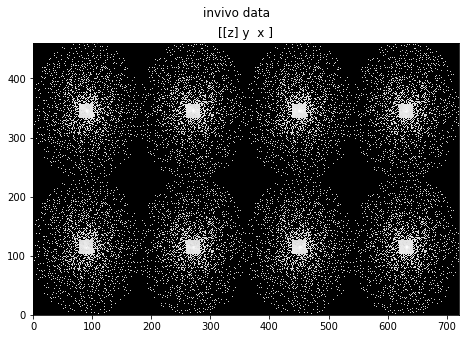

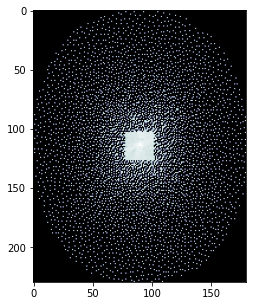

In [16]:
# Visualizing the invivo data
plt.rcParams["figure.figsize"] = (10,5)
pl.ImagePlot(np.log(np.abs(ksp_invivo)+1e-16), z=0,title='invivo data')

plt.imshow(np.log(np.abs(ksp_invivo[0,:,:]+10e-16)),cmap='bone') #adding a small value to prevent log(0)
plt.show()


##  2. Reconstruction of the full phantom data



#### Direct reconstruction from full data

Hint: use sigpy ifft with axes=(-1, -2), axis=0



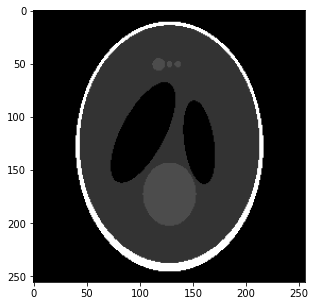

In [17]:
ifft_ksp = np.abs(sp.ifft(ksp_phantom, oshape=None, axes=(-1,-2), center=True, norm='ortho')[0,:,:])
plt.rcParams["figure.figsize"] = (10,5)
 
plt.imshow(ifft_ksp,'gray') #adding a small value to prevent log(0)
plt.show()


#### Wavelet transform 

Hint: use sigpy fwt

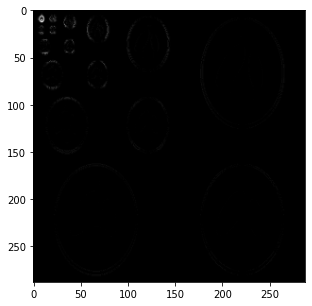

In [18]:
fwt_ksp = np.abs(sp.fwt(ifft_ksp))
plt.rcParams["figure.figsize"] = (10,5)
 
plt.imshow(fwt_ksp,'gray') #adding a small value to prevent log(0)
plt.show()

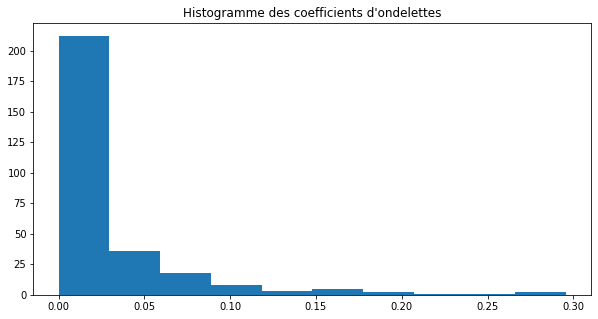

In [19]:
#the histogram of the wavelet coefficients ordered from the largest to the smallest
fwt_ksp_coeff = []
for i in range(288):
  fwt_ksp_coeff.append(np.mean(fwt_ksp[i,:]))
fwt_ksp_coeff.sort(reverse=True)
plt.hist(fwt_ksp_coeff)
plt.title("Histogramme des coefficients d'ondelettes")
plt.show()

## 3. Compressed Sensing on phantom data

#### Code example for  generating masks 

Hint: use the poisson sampling function from sigpy https://sigpy.readthedocs.io/en/latest/generated/sigpy.mri.poisson.html#sigpy.mri.poisson

In [20]:
#Example sampling for a single accelerating factor

acc=(6) #Float Target acceleration factor. Must be greater than 1.
shape_calib=20 # Size of the calibration window.
shape_z=ksp_phantom.shape[1]
shape_y=ksp_phantom.shape[2]

random_seed = 42
file_name = './mask_logan_r%0.2g_c%d.npy' % (acc, shape_calib)
print('Creating mask (%s)...' % file_name)

mask = poisson(img_shape=[shape_z, shape_y], accel=acc, 
               max_attempts =15, tol=0.5, 
               calib=(shape_calib, shape_calib))

print(mask.shape)
print(mask.dtype)

np.save(file_name, mask.astype(np.complex64))



Creating mask (./mask_logan_r6_c20.npy)...
(256, 256)
complex128


#### Direct Reconstruction from sampled data

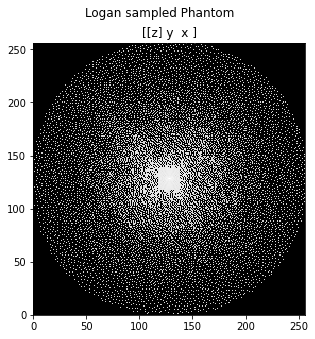

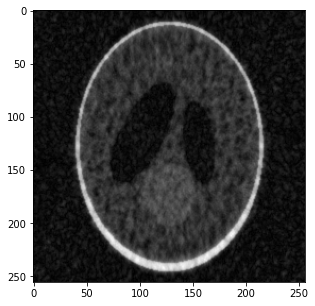

In [21]:
masked_ksp_phantom = mask*ksp_phantom
ifft_masked_ksp_phantom= np.abs(sp.ifft(masked_ksp_phantom, oshape=None, axes=(-1,-2), center=True, norm='ortho')[0,:,:])
plt.rcParams["figure.figsize"] = (10,5)

pl.ImagePlot(np.log(np.abs(masked_ksp_phantom)+1e-16), z=0,title='Logan sampled Phantom')

plt.imshow(ifft_masked_ksp_phantom,'gray') #adding a small value to prevent log(0)
plt.show()

####  L1 and Wavelet reconstructions of phantom data
Hint: Use the optimization apps  https://sigpy.readthedocs.io/en/latest/mri_app.html

To run an App, you simply do `app.run()`. You should be able to see a progress bar showing the `App`'s progress. 



MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

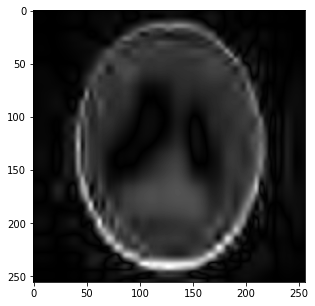

In [22]:
mps_phantom = np.ones((1, 256, 256))
y = masked_ksp_phantom
sp.mri.app.L1WaveletRecon(y, mps_phantom,1).run()
 
plt.imshow(np.abs(sp.mri.app.L1WaveletRecon(y, mps_phantom,1).run()),'gray') #adding a small value to prevent log(0)
plt.show()

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

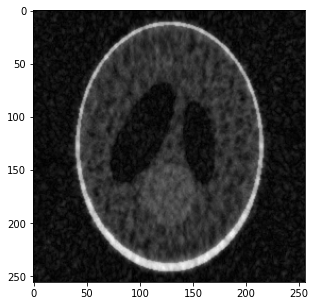

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

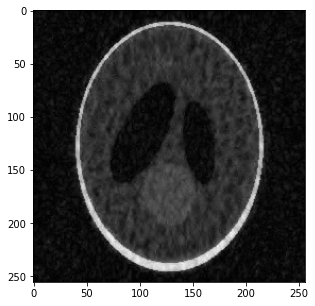

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

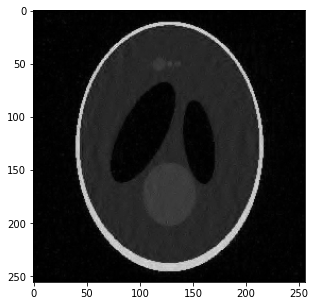

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

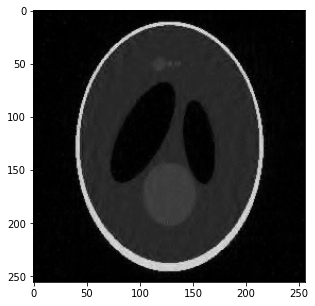

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

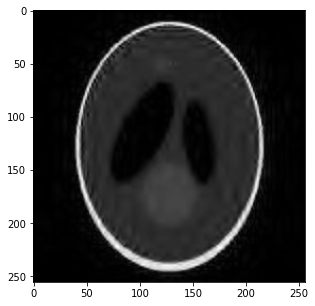

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

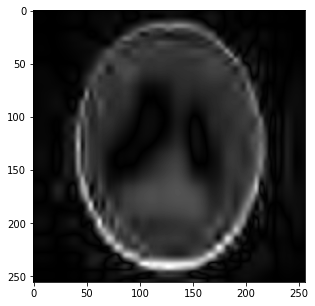

In [23]:
lamda = (0.00001, 0.0001, 0.001,0.01, 0.1,1)
for i in range(len(lamda)):
  #sp.mri.app.L1WaveletRecon(y, mps_phantom,lamda[i]).run()
 
  plt.imshow(np.abs(sp.mri.app.L1WaveletRecon(y, mps_phantom,lamda[i]).run()),'gray') #adding a small value to prevent log(0)
  plt.show()


In [24]:
lamda_optim = lamda[0]
for i in range(len(lamda)):
  if PSNR(ifft_ksp,sp.mri.app.L1WaveletRecon(y, mps_phantom,lamda[i]).run())> PSNR(ifft_ksp,sp.mri.app.L1WaveletRecon(y, mps_phantom,lamda_optim).run()):
    lamda_optim = lamda[i]
print('optimal lambda:', lamda_optim)

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

optimal lambda: 0.001


In [ ]:
PSNR(ifft_ksp,sp.mri.app.L1WaveletRecon(y, mps_phantom,0.001).run())

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


30.510032460313596

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

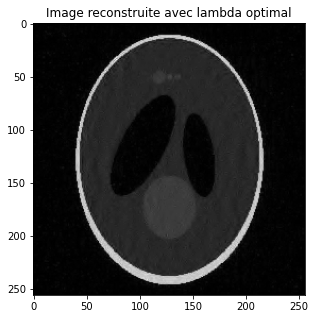

In [ ]:
plt.imshow(np.abs(sp.mri.app.L1WaveletRecon(y, mps_phantom,lamda_optim).run()),'gray') #adding a small value to prevent log(0)
plt.title('Image reconstruite avec lambda optimal')
plt.show()

## 4. Compressed Sensing on invivo/brain

#### Sensitivity maps

To perform parallel imaging reconstruction of the multi-parallel data, we will use the ESPIRiT method to estimate first the sensitivity maps. To do this, we can use the [EspiritCalib](https://sigpy.readthedocs.io/en/latest/generated/sigpy.mri.app.EspiritCalib.html#sigpy.mri.app.EspiritCalib) App from sigpy.

To run an App, you simply do `app.run()`. You should be able to see a progress bar showing the `App`'s progress. 

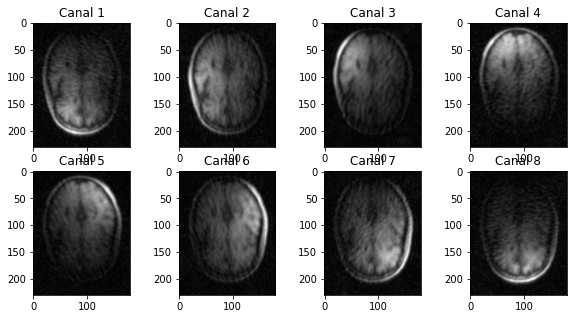

In [57]:
for i in range(8):
  ifft_ksp_invivo = np.abs(sp.ifft(ksp_invivo[i,:,:], oshape=None, axes=(-1,-2), center=True, norm='ortho'))
  plt.rcParams["figure.figsize"] = (10,5)
  plt.subplot(2,4,i+1)
  plt.imshow(ifft_ksp_invivo,'gray') #adding a small value to prevent log(0)
  plt.title('Canal '+str(i+1))
plt.show()

EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

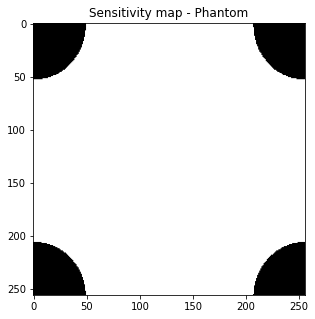

EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

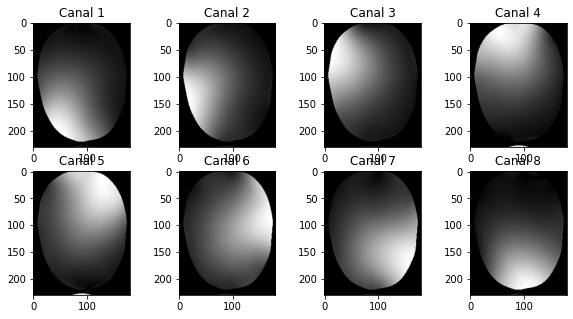

In [67]:
# Sensitivity maps

mps_phantom = mr.app.EspiritCalib(ksp_phantom).run()
plt.rcParams["figure.figsize"] = (10,5)
plt.imshow(np.abs(mps_phantom)[0],'gray') 
plt.title('Sensitivity map - Phantom')
plt.show()
mps = mr.app.EspiritCalib(ksp_invivo).run()
for i in range(8):
  plt.rcParams["figure.figsize"] = (10,5)
  plt.subplot(2,4,i+1)
  plt.imshow(np.abs(mps)[i],'gray') 
  plt.title('Canal '+str(i+1))
plt.show()

#### Reconstructions

Hint: Use the optimization apps  https://sigpy.readthedocs.io/en/latest/mri_app.html

To run an App, you simply do `app.run()`. You should be able to see a progress bar showing the `App`'s progress. 


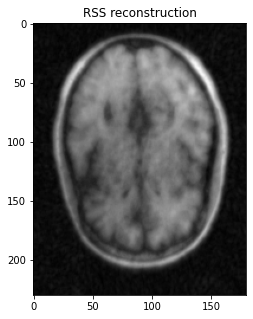

In [59]:
#RSS reconstruction 
sum = 0
for i in range(8):
  sum+=(np.abs(sp.ifft(ksp_invivo[i,:,:], oshape=None, axes=(-1,-2), center=True, norm='ortho')))**2
rss_ksp_invivo = np.sqrt(sum)
plt.rcParams["figure.figsize"] = (10,5)
plt.imshow(rss_ksp_invivo,'gray') 
plt.title('RSS reconstruction')
plt.show()


SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

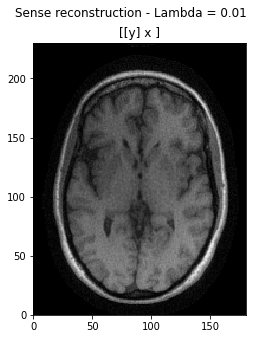

In [92]:
#Sense
lmda = 0.01
image_sense = mr.app.SenseRecon( ksp_invivo, mps, lmda ).run()
pl.ImagePlot( image_sense, title="Sense reconstruction - Lambda = "+ str(lmda) )

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

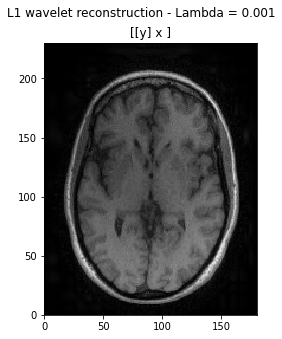

In [104]:
#L1 wavelet 
lmda = 0.001
image_L1wavelet = mr.app.L1WaveletRecon( ksp_invivo, mps, lmda ).run()
pl.ImagePlot(image_L1wavelet, title="L1 wavelet reconstruction - Lambda = "+ str(lmda) )

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

TotalVariationRecon:   0%|          | 0/100 [00:00<?, ?it/s]

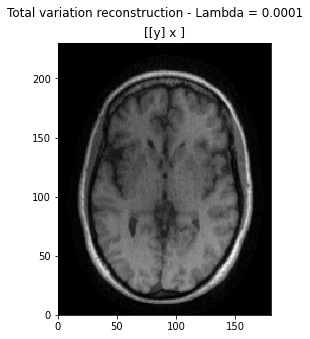

In [109]:
#Total variation 
lmda = 0.0001
image_totalvar = mr.app.TotalVariationRecon( ksp_invivo, mps, lmda ).run()
pl.ImagePlot(image_totalvar, title="Total variation reconstruction - Lambda = "+ str(lmda) )

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

TotalVariationRecon:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

TotalVariationRecon:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

TotalVariationRecon:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

TotalVariationRecon:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

TotalVariationRecon:   0%|          | 0/100 [00:00<?, ?it/s]

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

TotalVariationRecon:   0%|          | 0/100 [00:00<?, ?it/s]

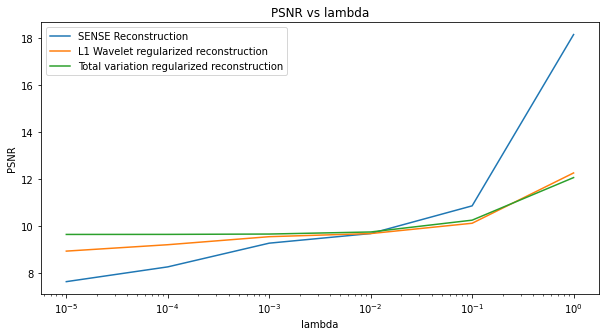

In [113]:
lambdas = [0.00001,0.0001,0.001,0.01,0.1,1]
senses    = []
l1s       = []
variances = []

for lmda in lambdas:
    image_sense = mr.app.SenseRecon( ksp_invivo, mps, lmda ).run()
    image_L1Wav = mr.app.L1WaveletRecon( ksp_invivo, mps, lmda ).run()
    image_var = mr.app.TotalVariationRecon( ksp_invivo, mps, lmda ).run()
    senses.append( PSNR(np.abs(sp.ifft(ksp_invivo, oshape=None, axes=(-1,-2), center=True, norm='ortho')), np.abs(image_sense)) )
    l1s.append( PSNR(np.abs(sp.ifft(ksp_invivo, oshape=None, axes=(-1,-2), center=True, norm='ortho')), np.abs(image_L1Wav)) )
    variances.append( PSNR(np.abs(sp.ifft(ksp_invivo, oshape=None, axes=(-1,-2), center=True, norm='ortho')), np.abs(image_var)) )

plt.plot( lambdas, senses )
plt.plot( lambdas, l1s )
plt.plot( lambdas, variances )

plt.legend(['SENSE Reconstruction','L1 Wavelet regularized reconstruction','Total variation regularized reconstruction'])
plt.xscale("log"); plt.xlabel("lambda"); plt.ylabel("PSNR")
plt.title("PSNR vs lambda")
plt.show()